## **Role Models**
**CSMODEL Machine Project**

Presented by Aldrin G. Hsu, Wesley Brian T. Sy, and Gian Martin C. Carlos



---
# **PHASE 1**
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, ttest_rel
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import f_oneway

### **Dataset Overview**  
The dataset includes national-level data from the Philippines showcasing the **percentage share of total family income and total family expenditure**, disaggregated by **each region, province, and highly urbanized city (HUC)** for the years **2018**, **2021**, and **2023**. These figures allow for data analysis in the trends of income distribution and household spending behavior across each geographic locations and time period in the Philippines.

---

### **How the Dataset Was Collected**  
The dataset was collected by the **Philippine Statistics Authority (PSA)** as part of their **Family Income and Expenditure Survey (FIES)**. The FIES is conducted every three years using techniques such as probability sampling to gather economic data across the country. The Surveys are administered in person by PSA field staffs.

---

### **Potential Implications of Data Collection**  
Since the survey relies on **self-reported data**, responses may be affected by **recall bias or underreporting**, especially on sensitive financial matters. Additionally, regions that are remote and households in the informal sector may have underpresented and inconsistent data due to logistical, economic, and social reasons. Factors such as these mentioned can affect the accuracy and generalizability of the income and expenditure shares reported in the dataset.

---

### **Structure of the Data**  
The dataset is **structured and tabular**.

Each **row** represents:  
- A specific **geographical unit** (Region, Province, or HUC) for a **specific year** (2018, 2021, or 2023).

Each **column** represents:  
- Either a share of **total income** (Table 6) or **total expenditure** (Table 7).

**Total Number of Observations**:  
- Varies based on the number of geographic units reported for each year.

**Attributes/Features Present**:  
- `Year` – The survey year  
- `Geographic_Unit` – Region/Province/HUC  
- `Income_Share` – % share to total national income  
- `Expenditure_Share` – % share to total national expenditure

---

### **Brief Description of the Attributes**

| Attribute Name            | Description |
|---------------------------|-------------|
| `Year`                    | Survey year (2018, 2021, or 2023) |
| `Region`                  | Name of the region (e.g., NCR, Region IV-A) |
| `Province` / `HUC`        | Name of the province or highly urbanized city |
| `Income_Share (%)`        | Share of the geographic unit to the total national family income |
| `Expenditure_Share (%)`   | Share of the geographic unit to the total national family expenditure |

In [2]:
#dfIncome = pd.read_excel("Table 6. 2018, 2021 and 2023p Share to Total Annual Family Income, by Region, Province and HUC.xlsx", engine="openpyxl")
#dfExpenditure = pd.read_excel("Table 7. 2018, 2021 and 2023p Share to Total Family Expenditure, by Region, Province and HUC.xlsx", engine="openpyxl")

In [3]:
#dfIncome.head(10)
#dfExpenditure.head(10)

### **Data Cleaning**
As seen in the dataframe above, there are unnecessary NaNs due to the way the files are formatted. To make the data easier to read and clean, we split the two datasets into six CSV files. The data in the files are based on whether they are for Income or Expenditure and based on their year (2018, 2021, or 2023). Note that we did not make new CSV files for Percentage Point Change since those values could be derived using the yearly data.

In [4]:
#Table 6. 2018, 2021 and 2023p Share to Total Annual Family Income, by Region, Province and HUC
Income18 = pd.read_csv("I18.csv")
Income21 = pd.read_csv("I21.csv")
Income23 = pd.read_csv("I23.csv")

#Table 7. 2018, 2021 and 2023p Share to Total Family Expenditure, by Region, Province and HUC
Expenditure18 = pd.read_csv("E18.csv")
Expenditure21 = pd.read_csv("E21.csv")
Expenditure23 = pd.read_csv("E23.csv")

You may use this code block to see the data of one of our dataframes.

In [5]:
#Initial state of the dataset
#Income18.head(10)
#Income21.head(10)
#Income23.head(10)

#Expenditure18.head(10)
#Expenditure21.head(10)
Expenditure23.head(10)

,Unnamed: 0,PHILIPPINES,NATIONAL CAPITAL REGION,City of Manila,City of Mandaluyong,City of San Juan,Quezon City,City of Marikina,City of Pasig,City of Caloocan,...,Dinagat Islands,BARMM - BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANAO (includes the 63 barangays from Cotabato for 2023)2/,Basilan,Lanao Del Sur,Maguindanao,Maguindanao del Sur,Maguindanao del Norte,Sulu,Tawi-Tawi,Cotabato City
0,Share to Family Expenditure,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100,100
1,Food and Non-Alcoholic Beverages,40.9,37.7,44.1,36.2,31.4,39.8,35.4,32.0,40.9,...,45.2,57.5,55.1,62.5,55.2,56.7,53.6,64.7,46.3,47
2,Food Consumed at Home,35.3,27.8,30.2,25.3,22.5,26.3,24.5,25.2,32.8,...,44.7,54.3,53.8,58.7,51.0,51.8,50.1,63.2,46.1,41.6
3,Food Regularly Consumed Outside the Home,5.6,9.9,13.9,10.9,9.0,13.5,10.9,6.8,8.2,...,0.6,3.2,1.4,3.8,4.2,4.8,3.6,1.5,0.2,5.3
4,Service for Processing Primary Goods for F...,0.0,-,-,0.0,-,-,-,0.0,-,...,-,0.0,0.0,0.0,0.0,0.0,-,0.0,0,-
5,Alcoholic Beverages and Tobacco,1.4,1.2,1.4,1.0,0.6,1.6,1.0,1.2,0.9,...,1.4,1.2,1.4,1.1,1.2,1.2,1.3,0.8,2.4,0.9
6,Clothing and Footwear,1.9,1.6,1.5,1.8,2.0,1.5,1.4,1.7,1.6,...,2.2,3.0,2.9,2.2,3.0,2.9,3.2,3.3,3.7,2.9
7,"Housing, Water, Electricity, Gas and Other Fuels",22.9,28.8,26.2,30.5,31.0,25.8,28.1,30.2,25.8,...,19.6,14.6,14.6,13.2,14.3,12.9,15.8,10.3,26.6,19.1
8,Furnishings and Routine Household Maintenance,2.6,2.6,1.9,2.4,3.1,2.9,3.0,2.5,2.3,...,2.8,2.2,2.1,1.5,2.7,2.8,2.7,2.6,2.4,2.6
9,Health,3.0,2.8,2.3,3.0,2.3,3.5,4.6,3.5,2.2,...,2.5,1.4,1.1,1.4,1.4,1.3,1.5,1.4,0.8,1.8


Since our dataset is split into 6 dataframes, it will be efficient to use loops for the operations that will follow.

In [6]:
IE = {
    "Income18": Income18,
    "Income21": Income21,
    "Income23": Income23,
    "Expenditure18": Expenditure18,
    "Expenditure21": Expenditure21,
    "Expenditure23": Expenditure23
}

We observed that the regions (ie. NCR and BARMM) and the cities (ie. City of Manila and City of Mandaluyong) are in the first row, while variables such as Wage/Salaries and Food and Non-Alcoholic Beverages are in the first column. Thus, we transposed each dataframe to avoid confusion on which are the variables and which are the observations.

In [7]:
for df in IE:
  IE[df] = IE[df].transpose()

#Observe the contents for Maguindanao del Norte and Maguindanao del Sur
IE["Expenditure18"].head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Unnamed: 0,Share to Family Expenditure,Food and Non-Alcoholic Beverages,Food Consumed at Home,Food Regularly Consumed Outside the Home,Service for Processing Primary Goods for F...,Alcoholic Beverages and Tobacco,Clothing and Footwear,"Housing, Water, Electricity, Gas and Other Fuels",Furnishings and Routine Household Maintenance,Health,Transport,Information and Communication,"Recreation, Sport and Culture",Education,Hotels (Accommodation Services),Insurance and Financial Services,"Personal Care, Social Protection and Miscellan...",Durable Furniture and Equipment,Special Family Occasion,Other Expenditures
PHILIPPINES,100.0,42.6,33.6,9.0,-,1.8,2.6,20.3,2.3,2.8,6.6,2.2,0.7,2.6,0.2,-,6.6,3.5,2.8,2.5
NATIONAL CAPITAL REGION,100.0,38.1,26.2,12.0,-,1.5,2.1,25.5,2.2,2.1,6.6,2.8,0.7,2.8,0.0,-,6.8,2.9,1.9,3.9
City of Manila,100.0,42.5,27.1,15.4,-,1.6,2.1,24.3,1.7,2.0,5.0,2.5,0.6,2.7,0.0,-,6.3,2.4,1.6,4.8
City of Mandaluyong,100.0,35.3,22.3,13.1,-,1.1,2.2,25.9,2.1,1.8,5.6,2.9,0.7,2.9,0.0,-,6.2,2.1,1.0,10.2
City of San Juan,100.0,34.2,22.0,12.1,-,1.1,2.2,28.2,2.6,3.3,6.0,3.1,0.8,3.5,0.0,-,5.4,1.3,1.2,7.1
Quezon City,100.0,36.7,25.0,11.7,-,1.6,2.0,24.3,2.5,2.3,8.0,2.8,0.8,3.4,0.0,-,6.8,3.9,1.7,3.1
City of Marikina,100.0,35.9,24.1,11.8,-,1.5,1.7,25.0,2.3,3.0,7.9,3.0,0.8,3.9,0.0,-,6.8,2.7,1.3,4.2
City of Pasig,100.0,38.8,27.1,11.7,-,1.5,2.7,24.7,2.1,2.1,6.0,2.9,0.9,3.0,0.0,-,6.7,2.8,2.6,3.3
City of Caloocan,100.0,44.5,31.8,12.8,-,2.0,1.8,22.2,1.8,1.8,7.3,2.5,0.5,2.2,0.0,-,7.0,2.1,2.6,1.8


We observed that Maguindanao del Norte and Maguindanao del Sur are the only regions that lack a majority of their expected values in both Income and Expenditure. Thus, we removed the rows for Maguindanao del Norte and and Maguindanao del Sur from all of our dataframes.

In [8]:
for df in IE:
  IE[df].drop(labels="Maguindanao del Sur", inplace=True)
  IE[df].drop(labels="Maguindanao del Norte", inplace=True)

IE["Expenditure23"].tail(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Surigao Del Norte,100.0,44.4,43.2,1.3,0.0,1.6,1.8,21.2,2.7,2.9,5.9,2.8,0.7,4.6,0.0,2.5,3.4,1.2,3.1,1.3
Surigao Del Sur,100.0,48.5,46.4,2.1,-,1.1,1.5,18.4,2.3,2.3,5.5,2.6,0.6,3.1,0.1,2.5,3.9,1.2,4.4,2.0
Dinagat Islands,100.0,45.2,44.7,0.6,-,1.4,2.2,19.6,2.8,2.5,5.3,1.9,0.9,3.6,0.1,2.3,3.6,2.5,4.5,1.8
BARMM - BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANAO (includes the 63 barangays from Cotabato for 2023)2/,100.0,57.5,54.3,3.2,0.0,1.2,3.0,14.6,2.2,1.4,5.0,1.7,0.7,2.1,0.0,0.8,4.7,1.6,2.3,1.4
Basilan,100.0,55.1,53.8,1.4,0.0,1.4,2.9,14.6,2.1,1.1,5.7,1.6,0.9,3.5,-,0.8,5.3,3.0,1.6,0.7
Lanao Del Sur,100.0,62.5,58.7,3.8,0.0,1.1,2.2,13.2,1.5,1.4,4.1,1.2,0.5,2.5,0.1,1.2,4.0,1.1,1.4,2.1
Maguindanao,100.0,55.2,51.0,4.2,0.0,1.2,3.0,14.3,2.7,1.4,5.5,2.2,0.9,1.9,0.0,0.5,4.8,1.6,3.6,1.2
Sulu,100.0,64.7,63.2,1.5,0.0,0.8,3.3,10.3,2.6,1.4,3.8,1.3,0.4,0.7,0.0,0.3,5.6,1.2,2.5,1.3
Tawi-Tawi,100,46.3,46.1,0.2,0,2.4,3.7,26.6,2.4,0.8,6.8,1.5,0.5,2.2,-,0.1,4.4,1.1,1.1,0.3
Cotabato City,100,47,41.6,5.3,-,0.9,2.9,19.1,2.6,1.8,6.3,2.9,1.1,2.6,0.1,1.2,4.4,2.5,3.2,1.5


We observed in our dataframes for Expenditure that variables such as Service for Processing Primary Goods for Food and Non- alcoholic Beverages and Hotels (Accommodation Services) have many missing values represented by "-". We replaced all instances of "-" with 0 since it seemed reasonable for those variables to not contribute to the total expenditure of the given regions/cities.

In [9]:
for df in IE:
  IE[df].iloc[1:, 1:] = (
    IE[df].iloc[1:, 1:]
    .apply(pd.to_numeric, errors='coerce')
    .fillna(0)
  )

Lastly, the dataset contains the mean statistics from each region -- which we will not be using as the dataset already contains the data from where the regional data is derived from, causing it to appear as a duplicate for the purpose of this study. Hence, we will be dropping these entries from the dataframes.

In [10]:
for df in IE:
  IE[df].drop(labels=["PHILIPPINES",
                              "NATIONAL CAPITAL REGION",
                              "CAR - CORDILLERA ADMINISTRATIVE REGION",
                              "REGION I - ILOCOS REGION",
                              "REGION II - CAGAYAN VALLEY",
                              "REGION III - CENTRAL LUZON",
                              "REGION IVA - CALABARZON",
                              "MIMAROPA REGION",
                              "REGION V - BICOL REGION",
                              "REGION VI - WESTERN VISAYAS",
                              "NEGROS ISLAND REGION",
                              "REGION VII - CENTRAL VISAYAS",
                              "REGION VIII - EASTERN VISAYAS",
                              "REGION IX - ZAMBOANGA PENINSULA",
                              "REGION X - NORTHERN MINDANAO",
                              "REGION XI - DAVAO REGION",
                              "REGION XII - SOCCSKSARGEN1/",
                              "CARAGA",
                              "BARMM - BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANAO (includes the 63 barangays from Cotabato for 2023)2/"
                              ],inplace=True)

This concludes the data cleaning for our dataset. You may use this code block to see how our data is currently organized in our dataframes.

In [11]:
#IE["Income18"].head(30)
#IE["Income21"].tail()
IE["Income23"].head(10)

#IE["Expenditure18"].tail()
#IE["Expenditure21"].tail()
#IE["Expenditure23"].head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Unnamed: 0,Share to Family Income,Wage/Salaries,Entrepreneurial Activities,Cash Receipts from Abroad,Cash Receipts from Domestic Sources,Rentals Received,Interest,Pension,Dividends,"Other Source of Income, NEC","Net Share of Crops, Aquaculture Products or Li...",Net Receipt from Family Sustenance Activities,Received as Gifts,Imputed Rent
City of Manila,100.0,64.3,16.2,4.1,2.9,0.5,0.0,1.6,0.4,0.1,0.0,0.0,1.5,8.5
City of Mandaluyong,100.0,63.5,12.4,5.5,1.9,0.6,0.1,3.3,0.1,0.1,0.0,0.0,1.5,11.0
City of San Juan,100.0,55.9,13.7,4.6,1.9,0.7,0.1,3.5,6.2,0.0,0.0,0.1,1.0,12.5
Quezon City,100.0,69.5,9.1,3.2,1.6,1.2,0.1,2.7,0.7,0.0,0.0,0.0,0.9,11.0
City of Marikina,100.0,64.3,9.3,5.4,2.2,0.8,0.1,4.0,0.3,0.0,0.0,0.0,1.3,12.4
City of Pasig,100.0,69.2,10.6,3.5,1.6,0.7,0.0,2.7,0.3,0.0,0.0,0.0,0.9,10.3
City of Caloocan,100.0,66.4,13.4,6.1,2.3,0.4,0.1,1.3,0.1,0.0,0.0,0.0,0.8,9.1
City of Malabon,100.0,69.8,11.2,5.0,2.7,0.2,0.1,1.2,0.0,0.0,0.0,0.0,0.6,9.2
City of Navotas,100.0,71.7,9.7,3.6,3.0,0.2,0.0,0.6,0.0,0.0,0.0,0.0,1.0,10.1


### **Exploratory Data Analysis**

### **1. Does having a higher percent in Cash Receipts from Abroad correlate to higher percent of spending in Education?**
Null and Alternative Hypotheses:
- H0: Cash receipts have no positive correlation with education.
- H1: Cash receipts have a positive correlation with education.

We will be using **Pearson’s Correlation** with a **one-tailed test** and significance level **0.05** for hypothesis testing.

To see the correlation of these variables with the latest data, we decided to only use tables from 2023. We isolated the key variables (Cash Receipts from Abroad and Education) and then used the pearsonr() function to find the correlation between each series.

In [12]:
#Get only the needed variables into a series
IEQ1 = {}
IEQ1.update({"Income23":IE["Income23"][3]})
IEQ1.update({"Expenditure23":IE["Expenditure23"][13]})

#Remove the label row and set all data types to numeric
for df in IEQ1:
  IEQ1[df] = IEQ1[df].iloc[1:]
  IEQ1[df] = list(IEQ1[df])

#Using pearson's correlation
correlation, p_value = pearsonr(IEQ1["Income23"], IEQ1["Expenditure23"])
if correlation > 0:
    p_one_tailed = p_value / 2
else:
    p_one_tailed = 1 - (p_value / 2)

print("Correlation coefficient (r):", correlation)
print("P-value (One-tailed):", p_one_tailed)

Correlation coefficient (r): 0.2640734878696867
P-value (One-tailed): 0.002007525596644448


Since p-value (~0.002) < significance level (0.05), we **reject** the null hypothesis.

We then conclude that cash receipts have a positive correlation with education.

The following code visualizes the data used for computation.

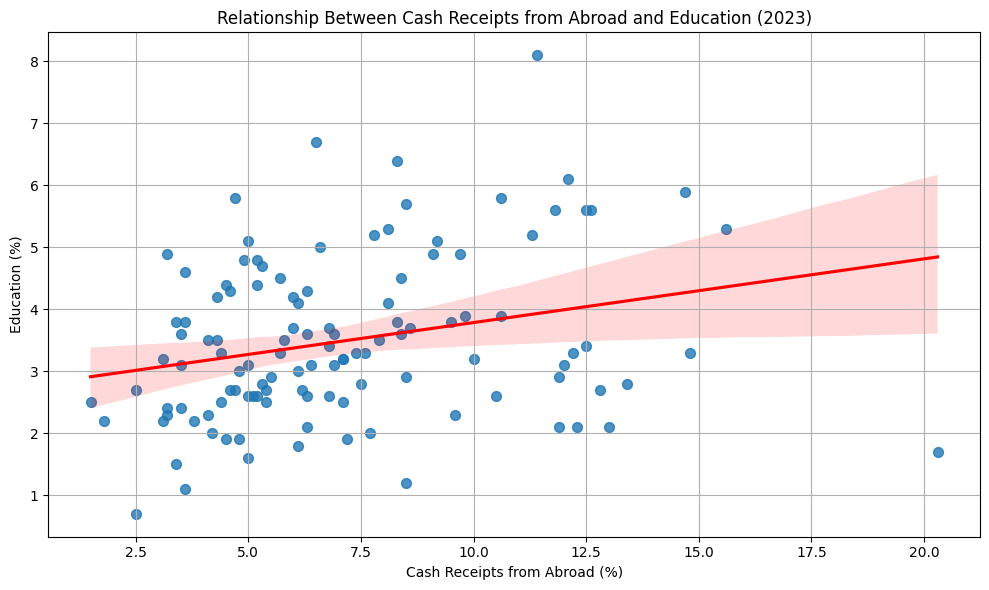

In [13]:
dfNumeric = pd.DataFrame({
    "Cash Receipts from Abroad": IEQ1["Income23"],
    "Education": IEQ1["Expenditure23"]
})

plt.figure(figsize=(10, 6))
sns.regplot(
    data=dfNumeric,
    x="Cash Receipts from Abroad",
    y="Education",
    scatter_kws={'s': 50},
    line_kws={'color': 'red'}
)
plt.title("Relationship Between Cash Receipts from Abroad and Education (2023)")
plt.xlabel("Cash Receipts from Abroad (%)")
plt.ylabel("Education (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

### **2. Does the contribution of salary to family income affect the expenditure habits of the cities in the Philippines?**
Here are the Null and Alternative Hypotheses:
- H0: There is no significant relationship between the percentage of income from wages/salaries and family expenditure in the Philippines.
- H1: There is a significant relationship between the percentage of income from wages/salaries and family expenditure in the Philippines.

To solve our rearch question, we will use **Pearson’s Correlation** with a **two-tailed test**, and we will use a significance level of **0.05** for our hypothesis testing.

To get the latest data, we decided to use only the data from 2023. We isolated Wages/Salaries from Income 2023 as its own dataframe. Then, we combined it and Expenditure 2023 into a new single dataframe.

In [14]:
Wages = IE["Income23"][1]
Expenditure = IE["Expenditure23"]
combinedDf = pd.concat([Wages, Expenditure], axis=1)

combinedDf

,1,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
Unnamed: 0,Wage/Salaries,Share to Family Expenditure,Food and Non-Alcoholic Beverages,Food Consumed at Home,Food Regularly Consumed Outside the Home,Service for Processing Primary Goods for F...,Alcoholic Beverages and Tobacco,Clothing and Footwear,"Housing, Water, Electricity, Gas and Other Fuels",Furnishings and Routine Household Maintenance,...,Transport,Information and Communication,"Recreation, Sport and Culture",Education,Hotels (Accommodation Services),Insurance and Financial Services,"Personal Care, Social Protection and Miscellan...",Durable Furniture and Equipment,Special Family Occasion,Other Expenditures
City of Manila,64.3,100.0,44.1,30.2,13.9,0.0,1.4,1.5,26.2,1.9,...,5.1,3.4,0.6,2.3,0.0,2.9,3.2,0.8,1.0,3.3
City of Mandaluyong,63.5,100.0,36.2,25.3,10.9,0.0,1.0,1.8,30.5,2.4,...,5.2,3.6,0.7,2.9,0.0,3.2,3.1,1.3,1.3,3.8
City of San Juan,55.9,100.0,31.4,22.5,9.0,0.0,0.6,2.0,31.0,3.1,...,6.5,3.2,0.9,2.7,0.1,3.3,3.0,1.4,1.6,7.0
Quezon City,69.5,100.0,39.8,26.3,13.5,0.0,1.6,1.5,25.8,2.9,...,7.2,3.8,0.8,2.3,0.1,2.8,3.4,2.0,1.1,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lanao Del Sur,27.9,100.0,62.5,58.7,3.8,0.0,1.1,2.2,13.2,1.5,...,4.1,1.2,0.5,2.5,0.1,1.2,4.0,1.1,1.4,2.1
Maguindanao,25.8,100.0,55.2,51.0,4.2,0.0,1.2,3.0,14.3,2.7,...,5.5,2.2,0.9,1.9,0.0,0.5,4.8,1.6,3.6,1.2
Sulu,13.9,100.0,64.7,63.2,1.5,0.0,0.8,3.3,10.3,2.6,...,3.8,1.3,0.4,0.7,0.0,0.3,5.6,1.2,2.5,1.3
Tawi-Tawi,24.8,100,46.3,46.1,0.2,0.0,2.4,3.7,26.6,2.4,...,6.8,1.5,0.5,2.2,0.0,0.1,4.4,1.1,1.1,0.3


We can see that the indexing for the columns is off, and the proper column headers are in the first row instead. To remedy this, we made the values of row 1 into the column headers, and we deleted the first row since it became redundant. We also see the column for Share to Family Expenditure as unnecessary since it represents the sum of all the other expenditure columns. Thus, we deleted that column as well.

In [15]:
combinedDf.columns = combinedDf.iloc[0]
combinedDf = combinedDf.drop(combinedDf.index[0])
combinedDf = combinedDf.drop("Share to Family Expenditure", axis=1)

You may use this code block to see the current state of our combined dataframe.

In [16]:
combinedDf

Unnamed: 0,Wage/Salaries,Food and Non-Alcoholic Beverages,Food Consumed at Home,Food Regularly Consumed Outside the Home,Service for Processing Primary Goods for Food and\n Non- alcoholic Beverages,Alcoholic Beverages and Tobacco,Clothing and Footwear,"Housing, Water, Electricity, Gas and Other Fuels",Furnishings and Routine Household Maintenance,Health,Transport,Information and Communication,"Recreation, Sport and Culture",Education,Hotels (Accommodation Services),Insurance and Financial Services,"Personal Care, Social Protection and Miscellaneous Goods and Services",Durable Furniture and Equipment,Special Family Occasion,Other Expenditures
City of Manila,64.3,44.1,30.2,13.9,0.0,1.4,1.5,26.2,1.9,2.3,5.1,3.4,0.6,2.3,0.0,2.9,3.2,0.8,1.0,3.3
City of Mandaluyong,63.5,36.2,25.3,10.9,0.0,1.0,1.8,30.5,2.4,3.0,5.2,3.6,0.7,2.9,0.0,3.2,3.1,1.3,1.3,3.8
City of San Juan,55.9,31.4,22.5,9.0,0.0,0.6,2.0,31.0,3.1,2.3,6.5,3.2,0.9,2.7,0.1,3.3,3.0,1.4,1.6,7.0
Quezon City,69.5,39.8,26.3,13.5,0.0,1.6,1.5,25.8,2.9,3.5,7.2,3.8,0.8,2.3,0.1,2.8,3.4,2.0,1.1,1.7
City of Marikina,64.3,35.4,24.5,10.9,0.0,1.0,1.4,28.1,3.0,4.6,7.4,3.8,0.9,2.5,0.0,3.2,3.4,1.5,1.4,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lanao Del Sur,27.9,62.5,58.7,3.8,0.0,1.1,2.2,13.2,1.5,1.4,4.1,1.2,0.5,2.5,0.1,1.2,4.0,1.1,1.4,2.1
Maguindanao,25.8,55.2,51.0,4.2,0.0,1.2,3.0,14.3,2.7,1.4,5.5,2.2,0.9,1.9,0.0,0.5,4.8,1.6,3.6,1.2
Sulu,13.9,64.7,63.2,1.5,0.0,0.8,3.3,10.3,2.6,1.4,3.8,1.3,0.4,0.7,0.0,0.3,5.6,1.2,2.5,1.3
Tawi-Tawi,24.8,46.3,46.1,0.2,0.0,2.4,3.7,26.6,2.4,0.8,6.8,1.5,0.5,2.2,0.0,0.1,4.4,1.1,1.1,0.3


We will be using Pearson's Correlation to determine the relationship between Wages/Salaries and the various Expenditure categories. To ensure tha the data is compatible with the pearsonr() function, we converted the data into numeric values and stored them in new variables as x (for Wages/Salaries) and y (for the various Expenditure categories).

Afterwards, we used the pearsonr() function to get the correlation coefficients (r) and the two-tailed p-values. Since there are 19 Expenditure categories to pair with Wages, we decided to use a for loop to calculate and display all the necessary values.

In [17]:
combinedDf = combinedDf.apply(pd.to_numeric, errors='coerce')

wages = combinedDf["Wage/Salaries"]

for col in combinedDf.columns:
    if col != "Wage/Salaries":
        spending = combinedDf[col]
        r, p = pearsonr(wages, spending)

        strength = ""
        abs_r = abs(r)
        if abs_r >= 0.7:
            strength = "strong"
        elif abs_r >= 0.4:
            strength = "moderate"
        elif abs_r >= 0.2:
            strength = "weak"
        else:
            strength = "very weak or none"

        direction = "positive" if r > 0 else "negative"

        significance = "significant" if p < 0.05 else "not significant"

        print(f"Correlation with {col.strip()}:")
        print(f"  r = {r:.4f}, p = {p:.4f}")
        print(f"  → {strength.capitalize()} {direction} correlation ({significance})")
        print("-" * 50)



Correlation with Food and Non-Alcoholic Beverages:
  r = -0.6328, p = 0.0000
  → Moderate negative correlation (significant)
--------------------------------------------------
Correlation with Food Consumed at Home:
  r = -0.7470, p = 0.0000
  → Strong negative correlation (significant)
--------------------------------------------------
Correlation with Food Regularly Consumed Outside the Home:
  r = 0.5677, p = 0.0000
  → Moderate positive correlation (significant)
--------------------------------------------------
Correlation with Service for Processing Primary Goods for Food and
    Non- alcoholic Beverages:
  r = -0.1940, p = 0.0361
  → Very weak or none negative correlation (significant)
--------------------------------------------------
Correlation with Alcoholic Beverages and Tobacco:
  r = -0.2753, p = 0.0027
  → Weak negative correlation (significant)
--------------------------------------------------
Correlation with Clothing and Footwear:
  r = -0.5848, p = 0.0000
  → Modera

15 out of 19 Expenditure categories show a significant relationship with Wages/Salaries. Since about **79%** of Expenditure categories show a significant relationship with Wages/Salaries, we **reject the null hypothesis**. Thus, there is **enough evidence** to conclude that there is a **significant relationship** between the percentage of income from wages/salaries and family expenditure in the Philippines.

The scatterplot graphs generated below provides visualizations on the significant Wages-Expenditure relationships. The red line sloping downwards is the regression line, which shows the direction of the relationship. The blue dots are the observations, and the closeness of the dots to one another show the strength of the relationship.

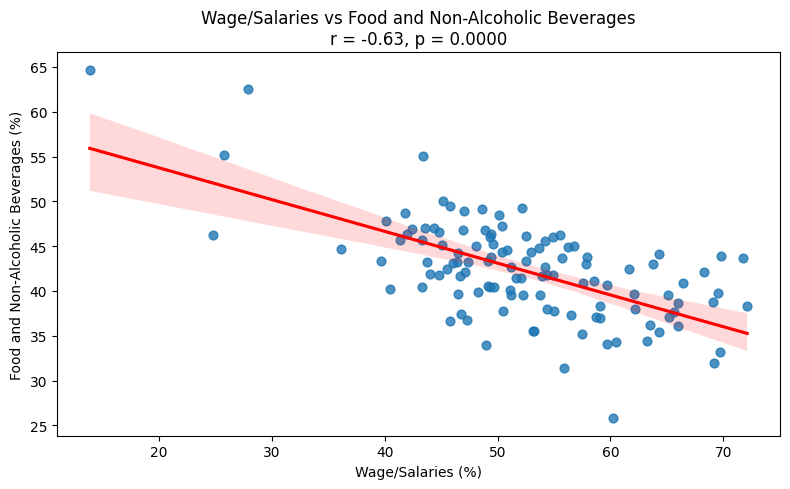

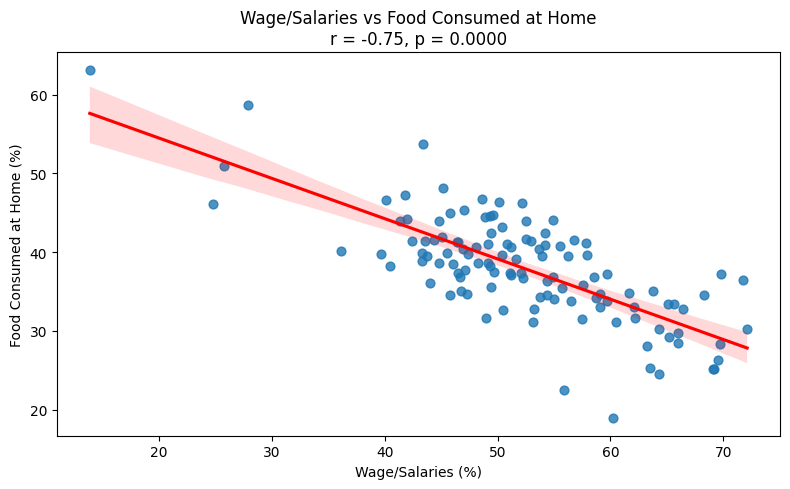

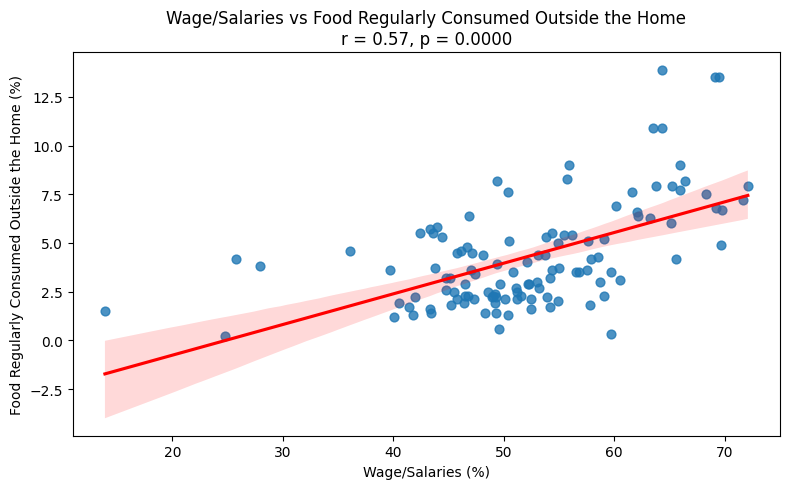

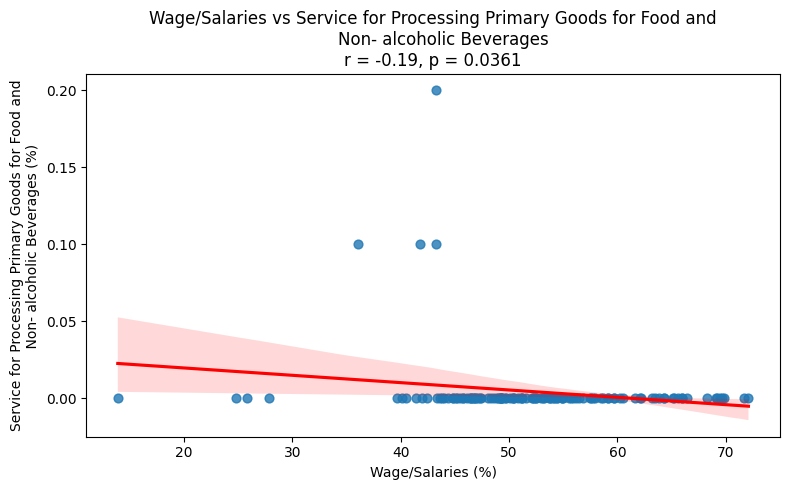

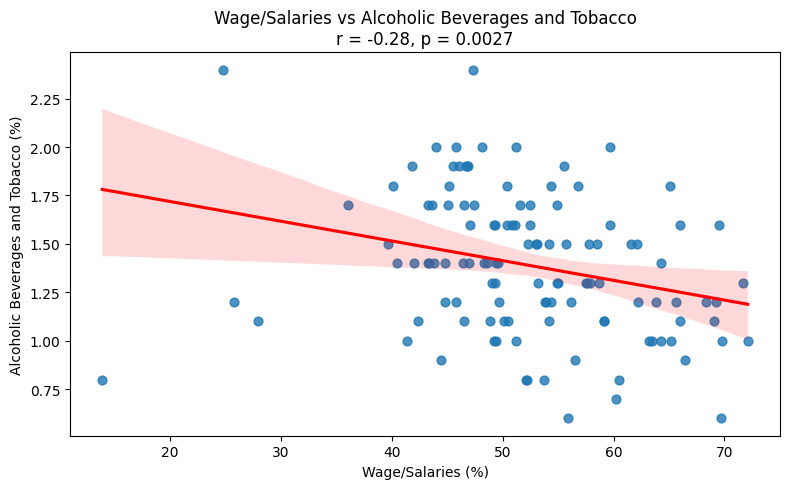

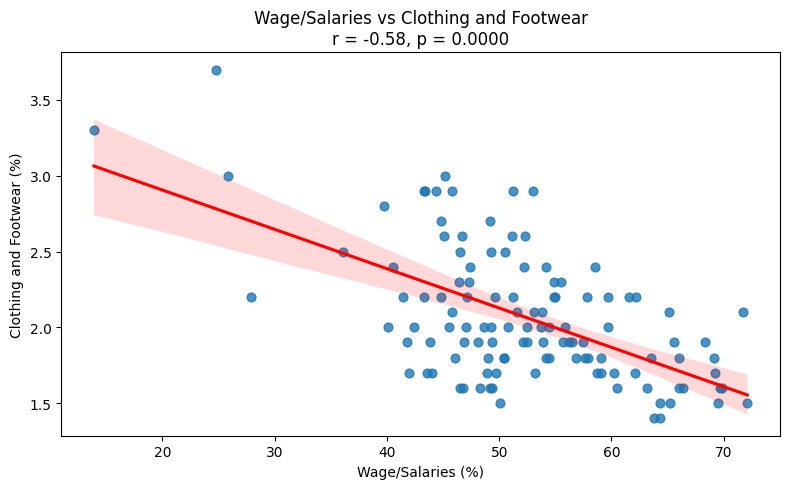

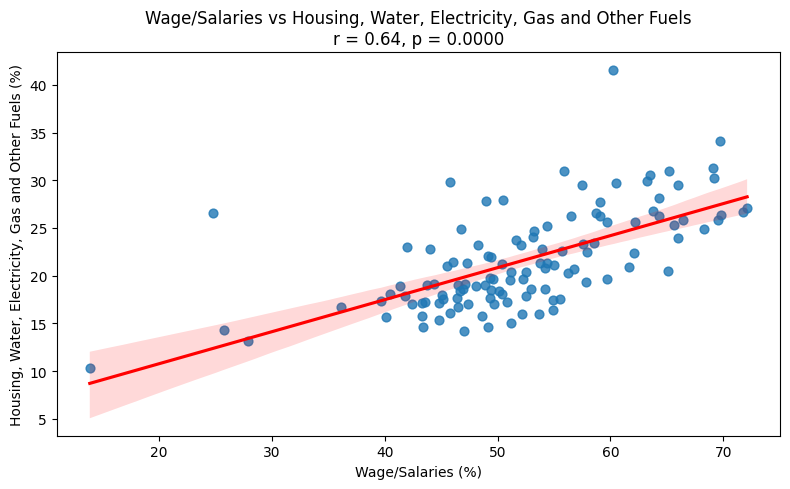

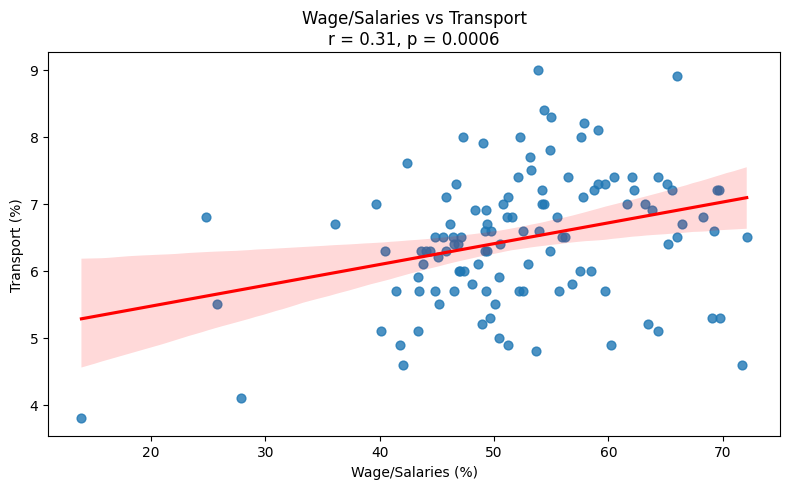

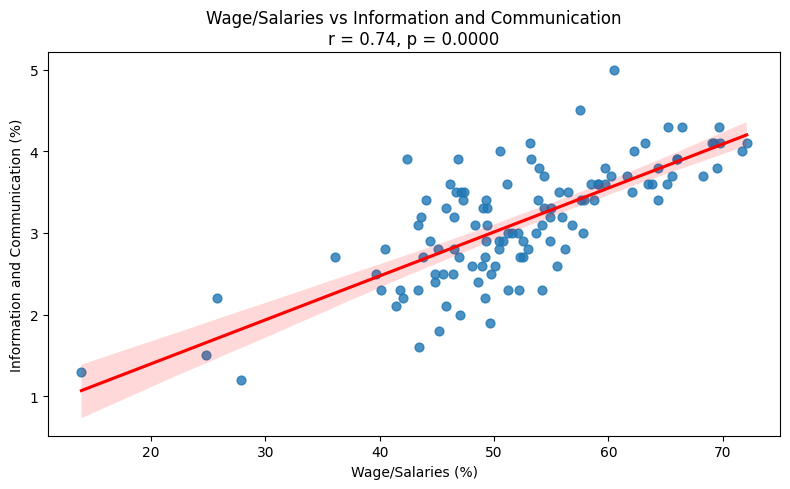

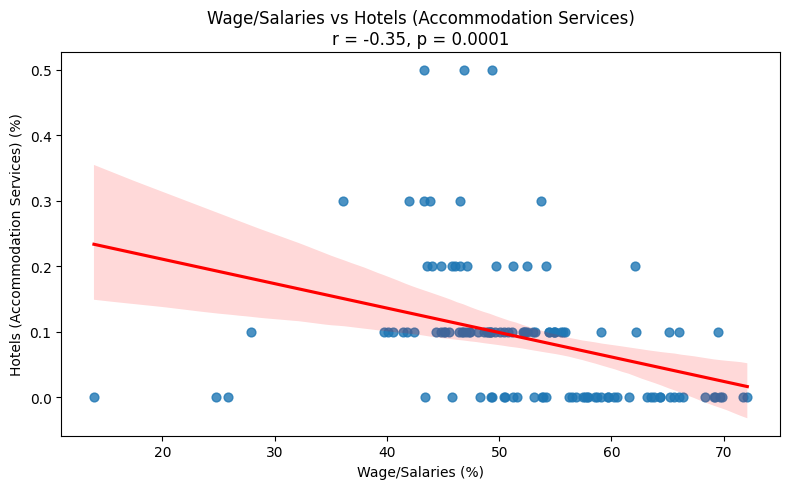

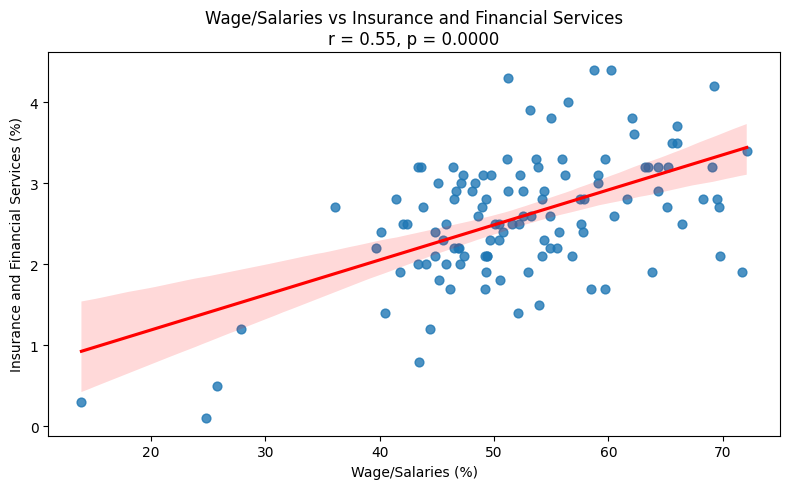

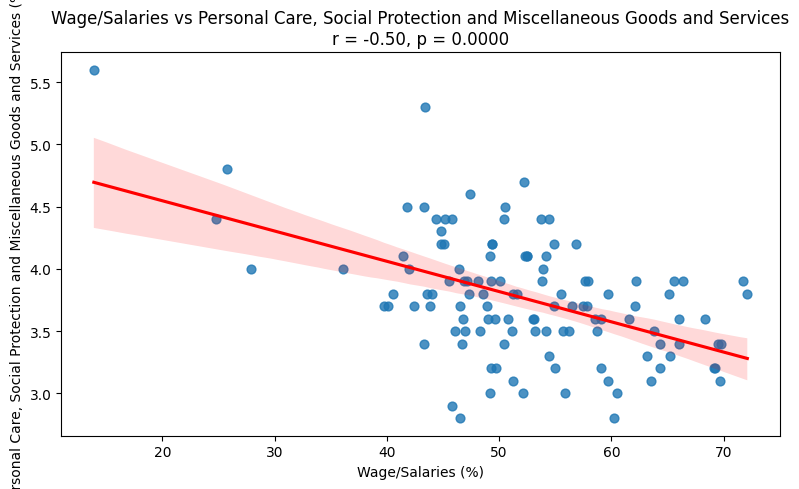

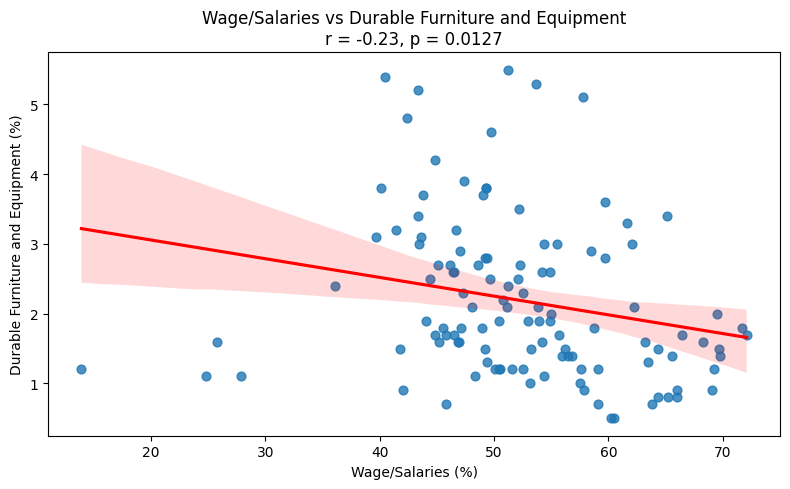

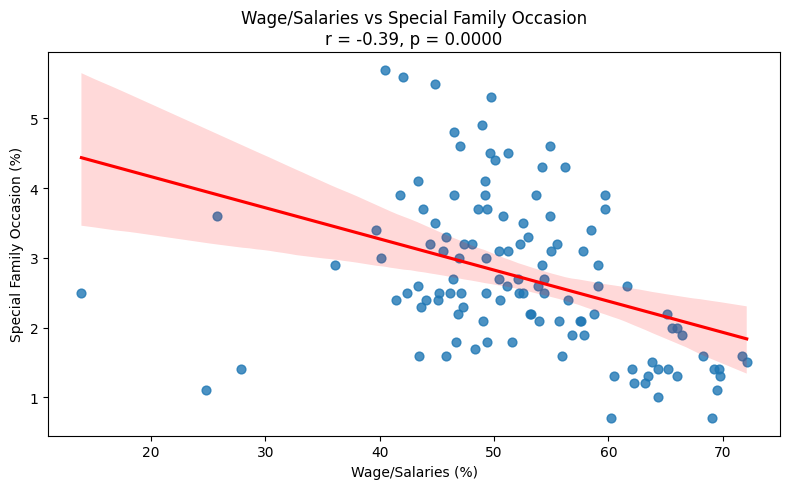

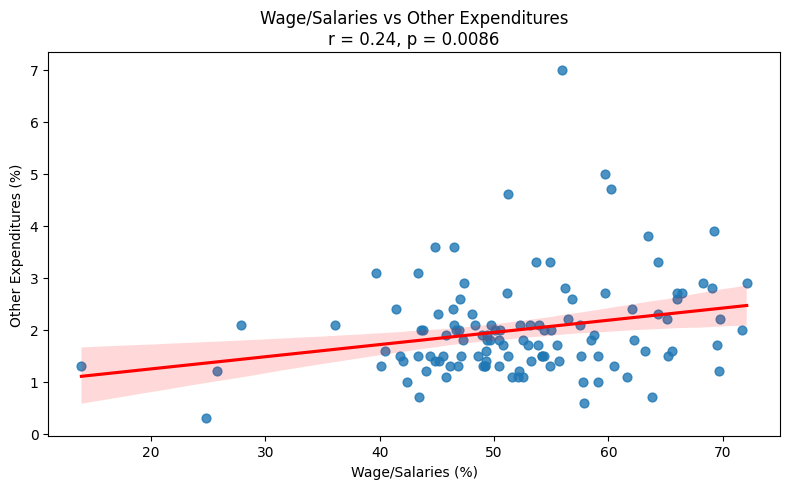

In [18]:
x = combinedDf["Wage/Salaries"]

for col in combinedDf.columns:
    if col != "Wage/Salaries":
        y = combinedDf[col]
        r, p = pearsonr(x, y)

        if p < 0.05:
            plt.figure(figsize=(8, 5))
            sns.regplot(x=x, y=y, scatter_kws={'s': 40}, line_kws={'color': 'red'})
            plt.title(f"Wage/Salaries vs {col.strip()}\n"
                      f"r = {r:.2f}, p = {p:.4f}", fontsize=12)
            plt.xlabel("Wage/Salaries (%)")
            plt.ylabel(f"{col.strip()} (%)")
            plt.tight_layout()
            plt.show()


### **3. Is there a significant increase in Health spending from 2018 to 2023?**
Null and alternative hypothesis:

- H0: The share in health spending did not increase from 2018 to 2023

- H1: The share in health spending increased from 2018 to 2023

Since we are dealing with data stretched across a time series, we can do a **paired t-test** to see the trend from 2018 to 2023, without having to use the data from 2021. Using a significance level of 0.05, we then compute for the result:

In [19]:
#Set the data type to numeric and remove the "Health" header for each series
IEQ3 = {}
IEQ3.update({"Expenditure18":pd.to_numeric(IE["Expenditure18"][9].iloc[1:])})
IEQ3.update({"Expenditure23":pd.to_numeric(IE["Expenditure23"][9].iloc[1:])})

ttest_rel(IEQ3["Expenditure18"],IEQ3["Expenditure23"])

TtestResult(statistic=np.float64(-2.840592458843996), pvalue=np.float64(0.005319947679832347), df=np.int64(116))

Since our p-value is less than our significance level (0.005 < 0.5), we **reject** the null hypothesis and conclude that the share in health spending increased from 2018 to 2023.

For visualization, we can display the differences in health spending for each region.

In [20]:
IEQ3["Expenditure23"] - IEQ3["Expenditure18"]

City of Manila         0.3
City of Mandaluyong    1.2
City of San Juan      -1.0
Quezon City            1.2
City of Marikina       1.6
                      ... 
Lanao Del Sur          0.0
Maguindanao            0.3
Sulu                   0.8
Tawi-Tawi              0.2
Cotabato City          0.4
Name: 9, Length: 117, dtype: float64

Most of the differences are positive, supporting our conclusion of increased health spending.

### **4. Does a higher percentage in income from entrepeneurial activities correlate to higher spending in transport?**
Here are the Null and Alternative Hypotheses:
- H0: There is no positive correlation between Entrepeneurial Activities and Transport.
- H1: There is a positive correlation between Entrepeneurial Activities and Transport.

To solve our rearch question, we will use **Pearson’s Correlation** with a **one-tailed test**, and we will use a significance level of **0.05** for our hypothesis testing.

To get the latest data, we decided to use only the data from 2023. We isolated the key variables (Entrepeneurial Activities and Transport) from Income 2023 and Expenditure 2023 as their own dataframes. Then, we combined them into a new single dataframe.

In [21]:
EntrepeneurialActivities = IE["Income23"][2]
Transport = IE["Expenditure23"][10]

dfCombined = pd.DataFrame({
    "Entrepreneurial Activities": EntrepeneurialActivities,
    "Transport": Transport
})

dfCombined

,Entrepreneurial Activities,Transport
Unnamed: 0,Entrepreneurial Activities,Transport
City of Manila,16.2,5.1
City of Mandaluyong,12.4,5.2
City of San Juan,13.7,6.5
Quezon City,9.1,7.2
...,...,...
Lanao Del Sur,45.8,4.1
Maguindanao,54.3,5.5
Sulu,74.7,3.8
Tawi-Tawi,49.5,6.8


We can see that the labels in the first row are redundant, so we removed it from the dataframe.

In [22]:
dfCombined = dfCombined.drop(dfCombined.index[0])

You may use this code block to see the current state of our combined dataframe.

In [23]:
dfCombined

,Entrepreneurial Activities,Transport
City of Manila,16.2,5.1
City of Mandaluyong,12.4,5.2
City of San Juan,13.7,6.5
Quezon City,9.1,7.2
City of Marikina,9.3,7.4
...,...,...
Lanao Del Sur,45.8,4.1
Maguindanao,54.3,5.5
Sulu,74.7,3.8
Tawi-Tawi,49.5,6.8


We will be using Pearson's Correlation to determine the relationship between Entrepeneurial Activities and Transport. To ensure that the data is compatible with the pearsonr() function, we converted the data into numeric values and stored them in new variables as x (for Entrepeneurial Activities) and y (for Transport).

Afterwards, we used the pearsonr() function to get the correlation coefficient (r) and the p-value. Since pearsonr() calculates the two-tailed p-value by default, we will use a formula to convert the p-value into its one-tailed version.

In [24]:
x = pd.to_numeric(dfCombined["Entrepreneurial Activities"], errors='coerce')
y = pd.to_numeric(dfCombined["Transport"], errors='coerce')

correlation, p_value = pearsonr(x, y)

if correlation > 0:
    p_one_tailed = p_value / 2
else:
    p_one_tailed = 1 - (p_value / 2)


print("Correlation coefficient (r):", correlation)
print("P-value (One-tailed):", p_one_tailed)

Correlation coefficient (r): -0.3666690419730354
P-value (One-tailed): 0.999976097073966


Our p-value is **0.999976097073966**. Since it is **greater** than our level of significance (0.05), we **failed to reject the null hypothesis**. Thus, there is **not enough evidence** to conclude that there is a **positive correlation** between Entrepeneurial Activities and Transport.

On the other hand, our correlation coefficient (r) is **-0.3666690419730354**, which implies that there is a **moderate negative** linear correlation between Entrepeneurial Activities and Transport. This means that as income gained in Entrepeneurial Activities increases, spending for Transport decreases, and vice versa.

The box plots generated below provides a visualization on this relationship. There are 3 box plots, one for each level of income from Entrpeneurial Activities. First, the large box in the middle of each box plot shows where the middle 50% of the data lies. The horizontal line in the middle of each box shows the median. The horizontal lines connected to the middle boxes are the whiskers which show the farthest data points that are not outliers. Lastly, the hollow circles are outliers.

C:\Users\Aldrin Hsu\AppData\Local\Temp\ipykernel_4092\489695071.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


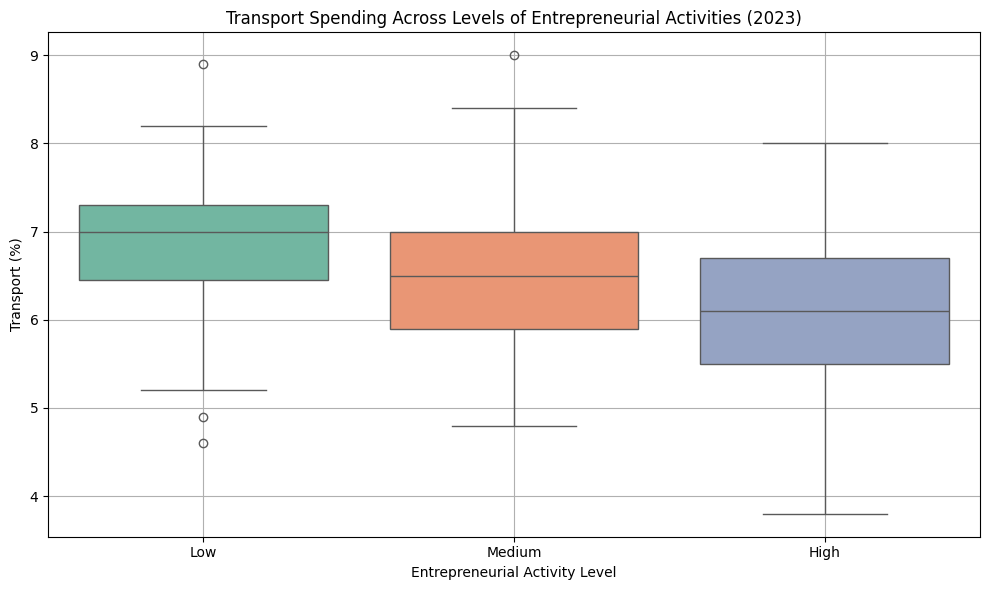

In [25]:
dfNumeric = pd.DataFrame({
    "Entrepreneurial Activities": x,
    "Transport": y
})

dfNumeric['Entrep_Level'] = pd.qcut(dfNumeric["Entrepreneurial Activities"], q=3, labels=["Low", "Medium", "High"])

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=dfNumeric,
    x="Entrep_Level",
    y="Transport",
    palette="Set2"
)

plt.title("Transport Spending Across Levels of Entrepreneurial Activities (2023)")
plt.xlabel("Entrepreneurial Activity Level")
plt.ylabel("Transport (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

## **Conclusion**  
We were able to describe, clean, and analyze our datasets for family income and expenditure in the Philippines. The main issues we addressed during data cleaning was missing values and odd formatting. We also gained the following insights from our Exploratory Data Analysis:

- A higher percent in income from Cash Receipts from Abroad correlates to higher percent of spending in Education in the Philippines.
- Income from Wages/Salaries affect the expenditure habits of the cities of the Philippines.
- Health spending in the Philippines increased in the span of the years 2018-2023.
- A higher percent in income from Entrepeneurial Activities does not correlate to higher percent of spending in Transport in the Philippines.

---
# **PHASE 2**
---

### **Data Mining**
For our Data Mining, we will be using **Clustering**. Since our dataset is divided into multiple dataframes, and the questions we want to reanalyze make use of different segments of these dataframes, we will create different clusters for each question that we aim to tackle. Note that for every chosen question, we will generate **30 clusters** using the **K-Means algorithm** to keep our data in line with the Central Limit Theorem.

### **Statistical Inference**
We decided to reanalyze our conclusions for Q1, Q3, and Q4 from our Exploratory Data Analysis. As for our chosen statistical inference techniques, we will use Paired Observations for Q3 and Multiple Means for Q1 and Q4.

### **1. Multiple Means**
For question 1, we want to further validate and identify patterns between **cash receipts from abroad** and **education spending** (2023). Clustering will help us group regions with similar income and expenditure profiles. This will give us a deeper understanding of the beyond correlation.

We are going to perform the following steps:
- Load and Process data
- Normalize the variables
- Apply the KMeans clustering algorithm of 30 clusters.
- Visualize the resulting clusters

In [26]:
cash_receipts = Expenditure23.iloc[3, 1:]      # Skip label column
education_spending = Expenditure23.iloc[13, 1:]


cash_receipts = pd.to_numeric(cash_receipts, errors='coerce')
education_spending = pd.to_numeric(education_spending, errors='coerce')

dfCluster = pd.DataFrame({
    "Cash Receipts from Abroad": cash_receipts,
    "Education": education_spending
})

dfCluster.dropna(inplace=True)
dfCluster.reset_index(drop=True, inplace=True)

dfCluster.head()

,Cash Receipts from Abroad,Education
0,5.6,3.3
1,9.9,2.4
2,13.9,2.3
3,10.9,2.9
4,9.0,2.7


####  Preprocessing and Clustering

In alignment with the Central Limit Theorem, we are going to be using **30 clusters** in KMeans to ensure we have enough grouped samples to approximate a normal distribution in our statistical inference step.


In [27]:
cash_receipts = pd.to_numeric(Expenditure23.iloc[3, 1:], errors='coerce')
education_spending = pd.to_numeric(Expenditure23.iloc[13, 1:], errors='coerce')

dfCluster = pd.DataFrame({
    "Cash Receipts from Abroad": cash_receipts,
    "Education": education_spending
})
dfCluster.dropna(inplace=True)
dfCluster.reset_index(drop=True, inplace=True)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(dfCluster)


kmeans = KMeans(n_clusters=30, random_state=42, n_init='auto')
dfCluster['Cluster'] = kmeans.fit_predict(X_scaled)


####  Cluster Visualization

To visualize the clustering output and to inspect regional profiles based on income from abroad and education spending.


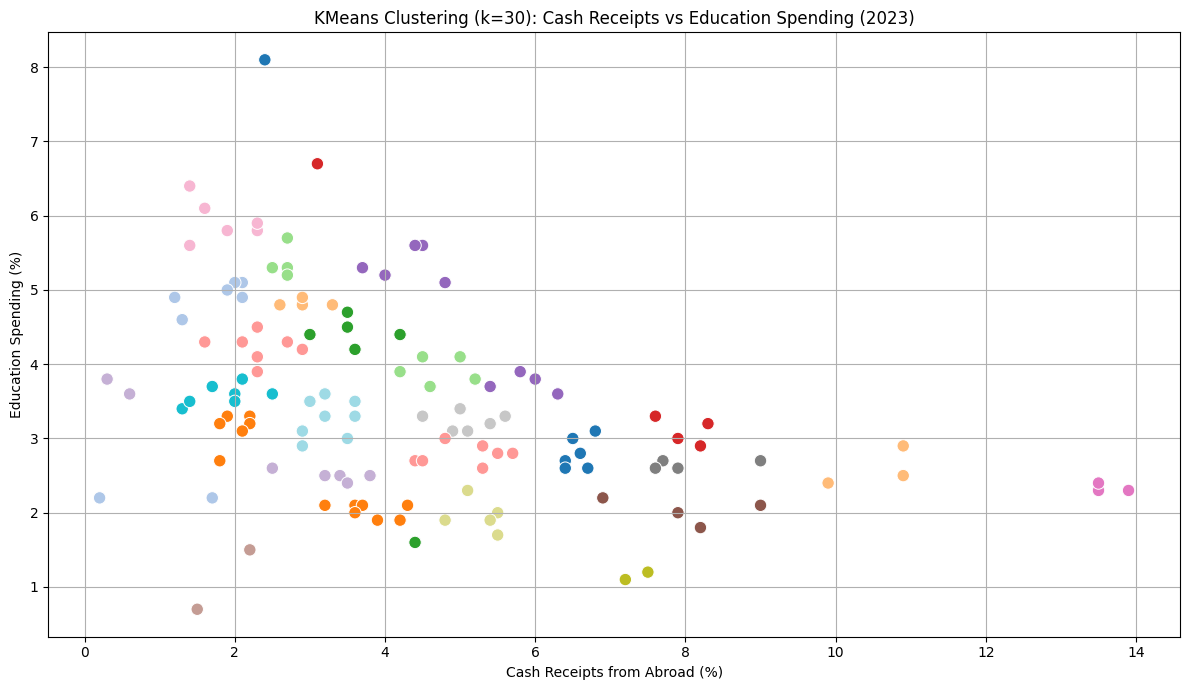

In [28]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=dfCluster,
    x="Cash Receipts from Abroad",
    y="Education",
    hue="Cluster",
    palette="tab20",
    s=80,
    legend=False
)
plt.title("KMeans Clustering (k=30): Cash Receipts vs Education Spending (2023)")
plt.xlabel("Cash Receipts from Abroad (%)")
plt.ylabel("Education Spending (%)")
plt.grid(True)
plt.tight_layout()
plt.show()



By using **30 clusters**,

we capture more granular behavior across regions:


We already performed Clustering. Now, we are going to be using Multiple Means (One-Way ANOVA)
to test if Education spending truly differs significantly across the clusters formed by
Cash Receipts from Abroad and Education.

####  Statistical Inference: Multiple Means (ANOVA)

We now test whether **education spending** truly varies across the 30 clusters we formed.

We will use a significance level of **0.05**.

##### **Hypotheses**:
- **H₀**: There is no significant difference in mean Education spending between the clusters.
- **H₁**: There is a significant difference in mean Education spending between at least one pair of clusters.


In [29]:
anova_groups = [group['Education'].values for _, group in dfCluster.groupby('Cluster')]

f_stat, p_value = f_oneway(*anova_groups)

print("F-statistic:", f_stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject H₀: Education spending differs significantly between clusters.")
else:
    print("Fail to reject H₀: No significant difference in Education spending.")


F-statistic: 211.0557405618738
P-value: 3.611512319826507e-82
Reject H₀: Education spending differs significantly between clusters.


#### Interpretation

Since our p-value is **less than 0.05**, we **reject the null hypothesis**.  
This confirms that **education spending varies significantly between the 30 clusters**. 

Now, we show this using boxplot.

C:\Users\Aldrin Hsu\AppData\Local\Temp\ipykernel_4092\1716588158.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfCluster, x='Cluster', y='Education', palette='husl')


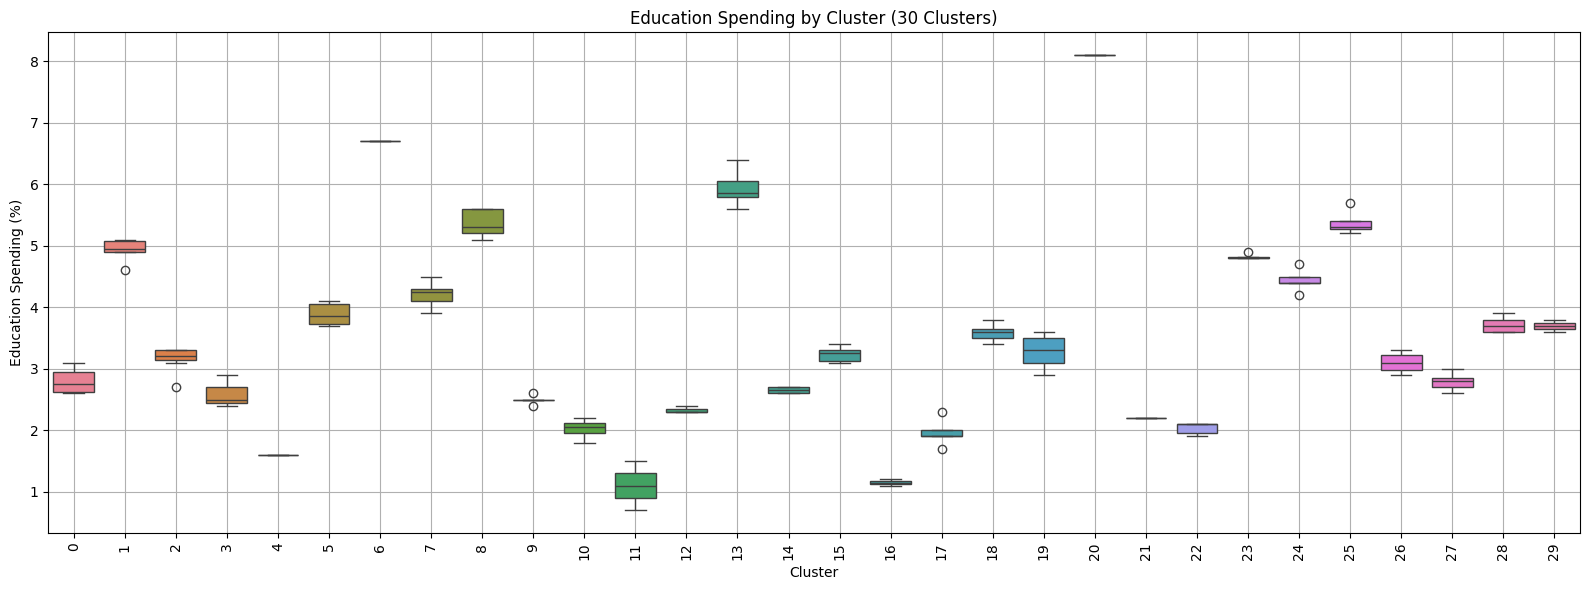

In [30]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=dfCluster, x='Cluster', y='Education', palette='husl')
plt.title("Education Spending by Cluster (30 Clusters)")
plt.xlabel("Cluster")
plt.ylabel("Education Spending (%)")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Final Conclusion

Each box plot shows the **spread and median** of education spending for each cluster.
- Differences in the **spread, median, and outliers** confirm that behavior across clusters is not uniform.

The ANOVA shows that these differences are systematic, not random, as they are aligned based on levels of Cash Receipts from Abroad. It also shows that the relationship between Cash Receipts from Abroad and Education spending still holds when the dataset is divided into clusters. Therefore, we strengthen our earlier conclusion that **regions with higher cash receipts from abroad tend to show higher education spending (2023)**.

### **2. Paired Observations**

To further validate our findings from question 3 **(Is there a significant increase in Health spending from 2018 to 2023?)**, we will apply the paired observations inference technique over sampled data.


Null and alternative hypothesis:

- H0: Health spendings from 2018 is equal or greater than health spendings from 2023, implying negative or no correlation.

- H1: Health spendings from 2018 is less than health spendings from 2023, implying a positive correlation.

Obtaining the original dataset, we first prepare the data using K-Means with 30 clusters:

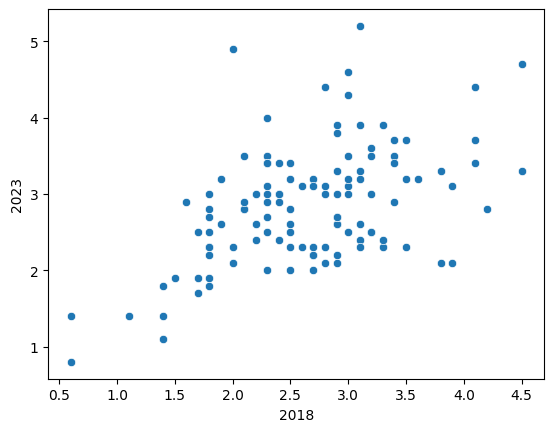

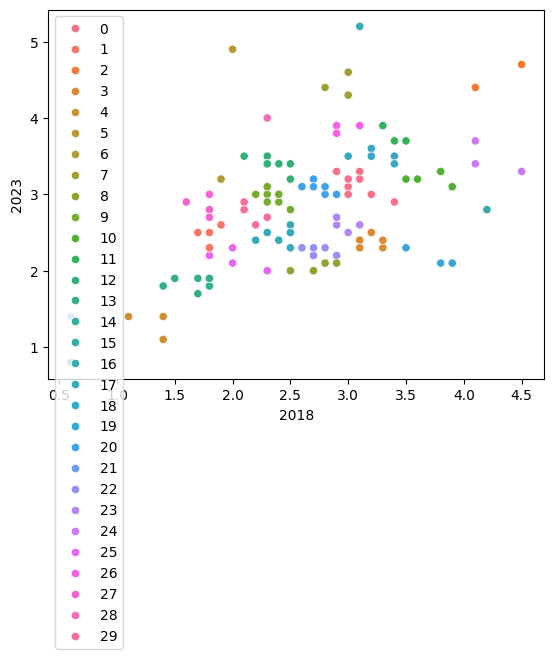

In [31]:
HealthSpendings2018 = IE["Expenditure18"][9].iloc[1:]
HealthSpendings2023 = IE["Expenditure23"][9].iloc[1:]
HealthSpendings = pd.concat([HealthSpendings2018,HealthSpendings2023], axis = 1)
HealthSpendings.columns = [2018,2023]

sns.scatterplot(data=HealthSpendings,x=2018,y=2023)
plt.show()

kmeans = KMeans(n_clusters=30, random_state=0, n_init='auto')
kmeans.fit(HealthSpendings)

sns.scatterplot(data = HealthSpendings, x = 2018, y = 2023, hue = kmeans.labels_, palette = sns.color_palette("husl", 30))
plt.show()

As seen in the data visualization, k-means algorithm shows clusters between health spendings from 2018 to 2023 that are characteristically close to each other, which allows us to apply our inference technique while avoiding bias.

No further preprocessing is needed, as the process for paired observations will yield the same result if normalized, so we will use the data obtained from K-Means as is.
The next step is to use the centroids obtained from each cluster (x,y), with x representing data from 2018 and y representing data from 2023, and use it on our paired observation.

In [32]:
Centroids = kmeans.cluster_centers_
HS2018 = []
HS2023 = []
for i in range(0,len(Centroids)):
  HS2018.append(Centroids[i][0])
  HS2023.append(Centroids[i][1])

ttest_rel(HS2018, HS2023)

TtestResult(statistic=np.float64(-1.9469214655734088), pvalue=np.float64(0.06128754270260652), df=np.int64(29))

Since our p-value ~0.06 < 0.5, we **reject** the null hypothesis, and conclude that the health spendings from 2018 is less than health spendings from 2023, implying a positive correlation.

For our visualization, we will use a box plot to show where the differences are from health spending in 2023 to health spending in 2018.

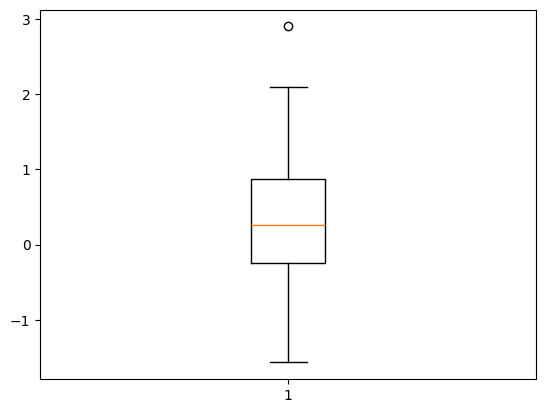

In [33]:
HS = [0] * len(HS2018)
for i in range(0,len(HS2018)):
  HS[i] = HS2023[i] - HS2018[i]
plt.boxplot(HS)
plt.show()

In the box plot, the differences can be seen to lean towards having more positive values, suggesting a positive correlation. Specifically, while the distribution slightly positively skewed, the interquartile range, which is the range of data between the first and third quartile, is positioned slightly above zero from the graph, meaning most of the data can be found on the positive number line.

### **3. Multiple Means**
We will use Multiple Means as our inference technique for revisiting Question 4 **(Does a higher percentage in income from entrepeneurial activities correlate to higher spending in transport?)**. We chose Multiple Means because it could help find patterns or differences in our data that might not be covered by Pearson's correlation. Our original conclusion for Question 4 was not only was there not enough evidence to conclude that there is a positive correlation between Entrepeneurial Activities and Transport, but in fact, there is a negative correlation between them.

We will use a significance level of **0.05** for our hypothesis testing.

Here are the Null and Alternative Hypotheses:
- H0: There is no significant difference in mean Transport spending between the clusters.
- H1: There is a significant difference in mean Transport spending between at least one pair of clusters.

To do this, we will revisit our dataframe called dfCombined, as it contains our cleaned dataset limited to the variables of Entrepeneurial Activities and Transport.

In [34]:
dfCombined

,Entrepreneurial Activities,Transport
City of Manila,16.2,5.1
City of Mandaluyong,12.4,5.2
City of San Juan,13.7,6.5
Quezon City,9.1,7.2
City of Marikina,9.3,7.4
...,...,...
Lanao Del Sur,45.8,4.1
Maguindanao,54.3,5.5
Sulu,74.7,3.8
Tawi-Tawi,49.5,6.8


Since K-Means makes use of Euclidean distance, it could be sensitive to the different scales of Entrepeneurial Activities and Transport. As seen in the dataframe, the values for Entrepeneurial Activities will be treated as more important by the K-Means algorithm since its values are larger in scale. To prevent this, we will standardize our data using StandardScaler.

After standardizing our dataframe and generating clusters using K-Means, we also generated scatterplot graphs below comparing the non-clustered dataset with the clustered dataset. Each circle in the scatterplots represent a city, and in the clustered scatterplot, each unique color represents a cluster.

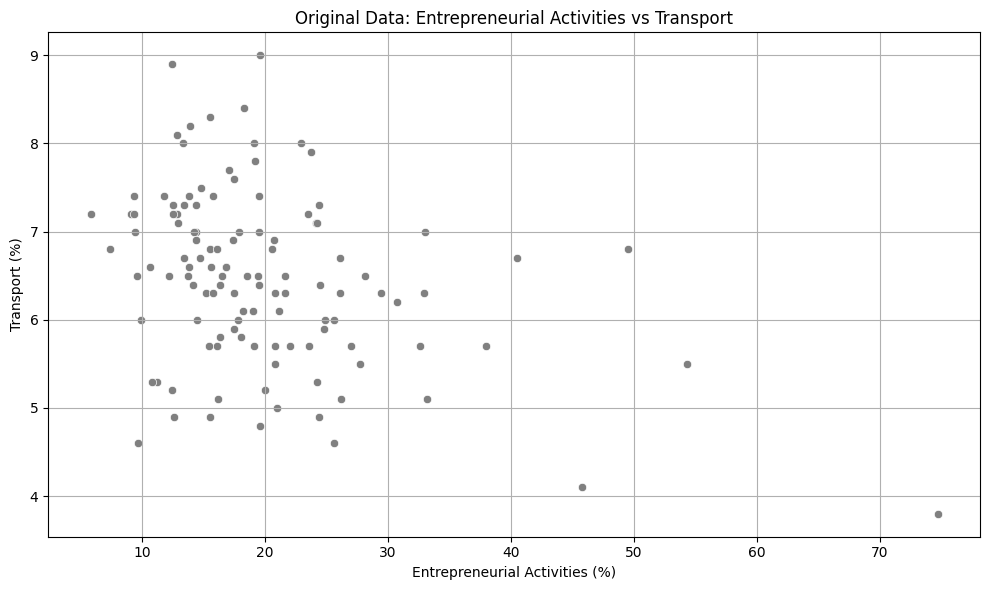

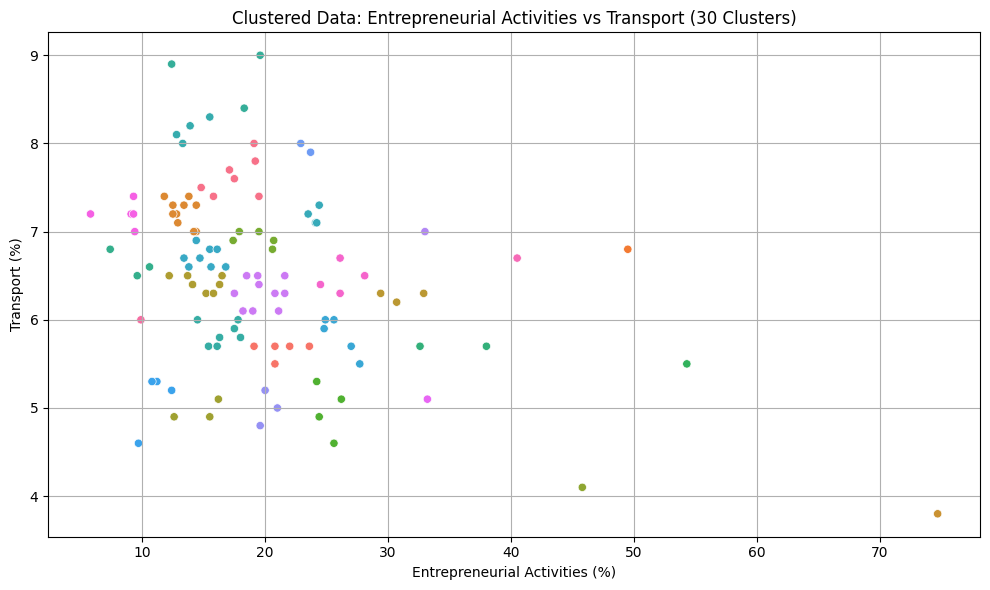

In [35]:
dfCombined['Transport'] = pd.to_numeric(dfCombined['Transport'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=dfCombined,
    x='Entrepreneurial Activities',
    y='Transport',
    color='gray'
)
plt.title("Original Data: Entrepreneurial Activities vs Transport")
plt.xlabel("Entrepreneurial Activities (%)")
plt.ylabel("Transport (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

X = dfCombined[['Entrepreneurial Activities', 'Transport']].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=30, random_state=0, n_init='auto')
dfCombined['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=dfCombined,
    x='Entrepreneurial Activities',
    y='Transport',
    hue='Cluster',
    palette=sns.color_palette("husl", 30),
    legend=False
)

plt.title("Clustered Data: Entrepreneurial Activities vs Transport (30 Clusters)")
plt.xlabel("Entrepreneurial Activities (%)")
plt.ylabel("Transport (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


After clustering the dataframe, we will now use our clusters to get the p-value with One-way ANOVA. We chose to use One-way ANOVA since we want to see if the means of Transport significantly vary between our clusters (which is fitting for the inference method of Multiple Means). The code below generates the resulting F-statistic and p-value.

In [36]:
groups = [group["Transport"].values for _, group in dfCombined.groupby("Cluster")]

f_stat, p_value = f_oneway(*groups)

print("F-statistic:", f_stat)
print("p-value:", p_value)


F-statistic: 132.35477071256537
p-value: 3.5472953428791716e-60


Our F-statistic is **132.35477071256537**, which means that Transport spending **differs significantly** across the 30 clusters formed from Entrepreneurial Activities and Transport.

Our p-value is **0.00000000000000000000000000000000000000000000000000000000000000355**. Since it is **less** than our level of significance (0.05), we **reject the null hypothesis**. Thus, there is **enough evidence** to conclude that mean Transport spending **differs** across the 30 clusters. In other words, the various clusters behave differently in their Transport spending. The ANOVA shows that the differences between the clusters are systematic, not random, which means that they may follow patterns that show the absence of a positive correlation between spending Entrepeneurial Activities and Transport.

The box plots generated below provides a visualization on the variation of Transport spending among the clusters. There are 30 box plots, one for each cluster. First, the large box in the middle of each box plot shows where the middle 50% of the data lies. The horizontal line in the middle of each box shows the median. The horizontal lines connected to the middle boxes are the whiskers which show the farthest data points that are not outliers. Lastly, the hollow circles are outliers. We can see from the box plots how the clusters differ in Transport spending especially in terms of median and spread.

C:\Users\Aldrin Hsu\AppData\Local\Temp\ipykernel_4092\676680595.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfCombined, x='Cluster', y='Transport', palette='husl')


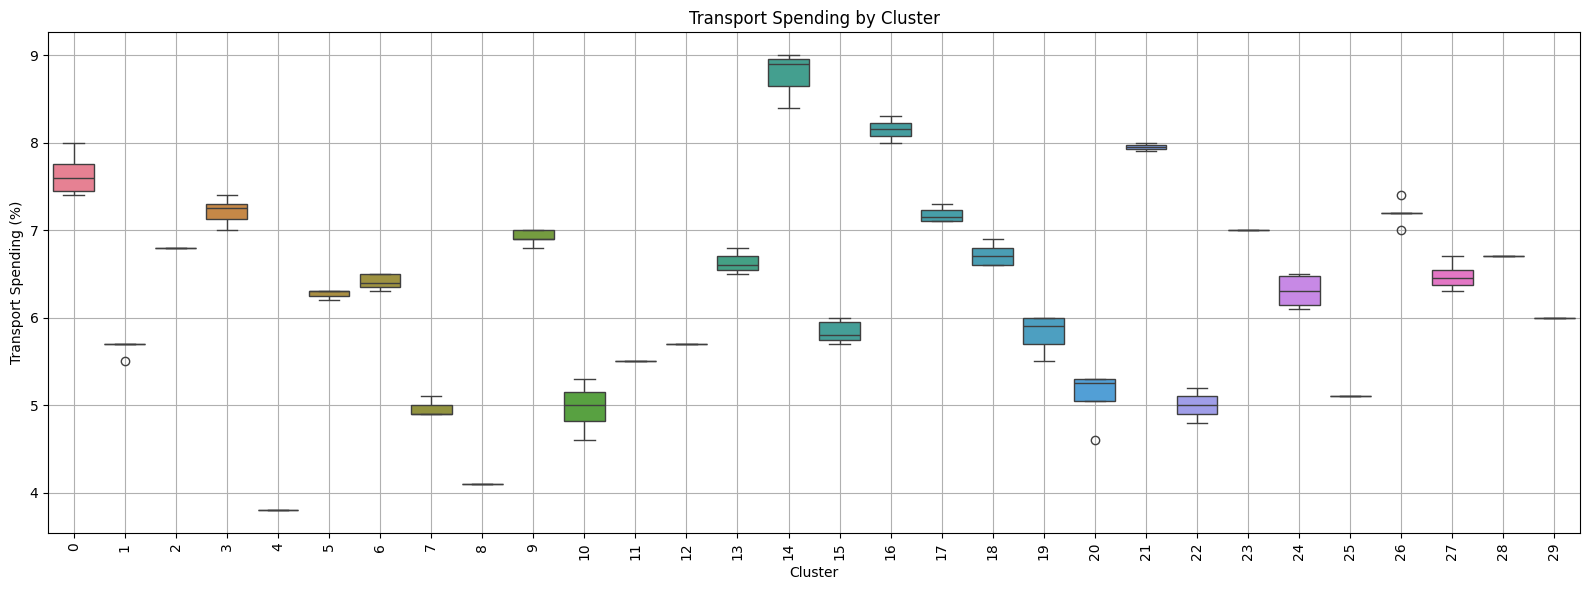

In [37]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=dfCombined, x='Cluster', y='Transport', palette='husl')
plt.title("Transport Spending by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Transport Spending (%)")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

## **Conclusion**  
We were able to generate different sets of clusters based on some of our EDA research questions. After using those clusters to perform statistical tests to gain the following additional insights on our dataset: 

- There is a significant difference in mean Education spending between at least one pair of clusters, but the differences are based on patterns that follow the overall trend of Cash Receipts from Abroad correlating to higher Education spending.
- Health spendings from 2018 is less than Health spendings from 2023, supporting the prior conclusion that health spending in the Philippines has increased in the span of the years 2018-2023.
- There is a significant difference in mean Transport spending between at least one pair of clusters, but the differences are based on patterns that may imply the absence of positive correlation between Entrepreneurial Activities and Transport, which was first seen in the overall trends.